## MOBILENET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.12.0


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 9944 images belonging to 5 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 1500 images belonging to 5 classes.


In [5]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model
     

input_shape = 224, 224, 3
n_classes = 5

K.clear_session()
model = mobilenet(input_shape, n_classes)
model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 112, 112, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

In [6]:
model_path = "MOBILENET.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 20
batch_size = 512

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 1.0730 - accuracy: 0.5707 - precision: 0.7538
Epoch 1: accuracy improved from -inf to 0.57072, saving model to MOBILENET.h5
19/19 [==============================] - 129s 6s/step - loss: 1.0730 - accuracy: 0.5707 - precision: 0.7538 - val_loss: 1.6759 - val_accuracy: 0.1562 - val_precision: 0.0000e+00
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.8388 - precision: 0.8581
Epoch 2: accuracy improved from 0.57072 to 0.83882, saving model to MOBILENET.h5
19/19 [==============================] - 123s 6s/step - loss: 0.4386 - accuracy: 0.8388 - precision: 0.8581 - val_loss: 1.8181 - val_accuracy: 0.1562 - val_precision: 0.0000e+00
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9507 - precision: 0.9533
Epoch 3: accuracy improved from 0.83882 to 0.95066, saving model to MOBILENET.h5
19/19 [==============================] - 123s 6s/step - loss: 

Epoch 72/100
15/15 [==============================] - ETA: 0s - loss: 0.2199 - accuracy: 0.9187 - precision: 0.9244
Epoch 72: accuracy did not improve from 0.94167
15/15 [==============================] - 52s 3s/step - loss: 0.2199 - accuracy: 0.9187 - precision: 0.9244 - val_loss: 3.3144 - val_accuracy: 0.4083 - val_precision: 0.4046
Epoch 73/100
15/15 [==============================] - ETA: 0s - loss: 0.2418 - accuracy: 0.9042 - precision: 0.9135
Epoch 73: accuracy did not improve from 0.94167
15/15 [==============================] - 54s 4s/step - loss: 0.2418 - accuracy: 0.9042 - precision: 0.9135 - val_loss: 1.8289 - val_accuracy: 0.5500 - val_precision: 0.5458
Epoch 74/100
15/15 [==============================] - ETA: 0s - loss: 0.2346 - accuracy: 0.9167 - precision: 0.9181
Epoch 74: accuracy did not improve from 0.94167
15/15 [==============================] - 49s 3s/step - loss: 0.2346 - accuracy: 0.9167 - precision: 0.9181 - val_loss: 2.9074 - val_accuracy: 0.5188 - val_precisi

15/15 [==============================] - ETA: 0s - loss: 0.1964 - accuracy: 0.9208 - precision: 0.9263
Epoch 96: accuracy did not improve from 0.96250
15/15 [==============================] - 49s 3s/step - loss: 0.1964 - accuracy: 0.9208 - precision: 0.9263 - val_loss: 0.8412 - val_accuracy: 0.7625 - val_precision: 0.7735
Epoch 97/100
15/15 [==============================] - ETA: 0s - loss: 0.1367 - accuracy: 0.9458 - precision: 0.9553
Epoch 97: accuracy did not improve from 0.96250
15/15 [==============================] - 49s 3s/step - loss: 0.1367 - accuracy: 0.9458 - precision: 0.9553 - val_loss: 0.7242 - val_accuracy: 0.8250 - val_precision: 0.8291
Epoch 98/100
15/15 [==============================] - ETA: 0s - loss: 0.2155 - accuracy: 0.9375 - precision: 0.9414
Epoch 98: accuracy did not improve from 0.96250
15/15 [==============================] - 48s 3s/step - loss: 0.2155 - accuracy: 0.9375 - precision: 0.9414 - val_loss: 0.7223 - val_accuracy: 0.8313 - val_precision: 0.8379
Ep

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

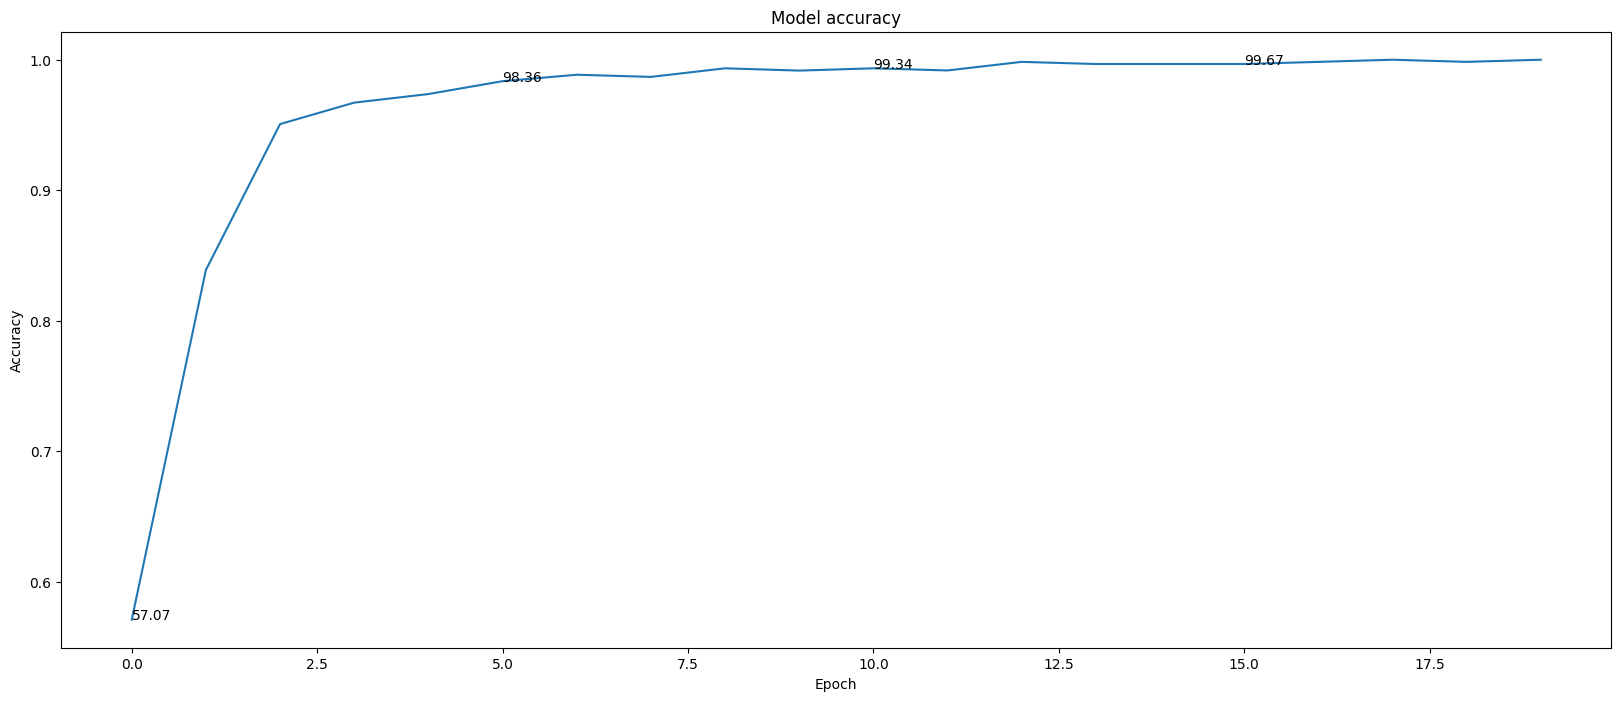

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

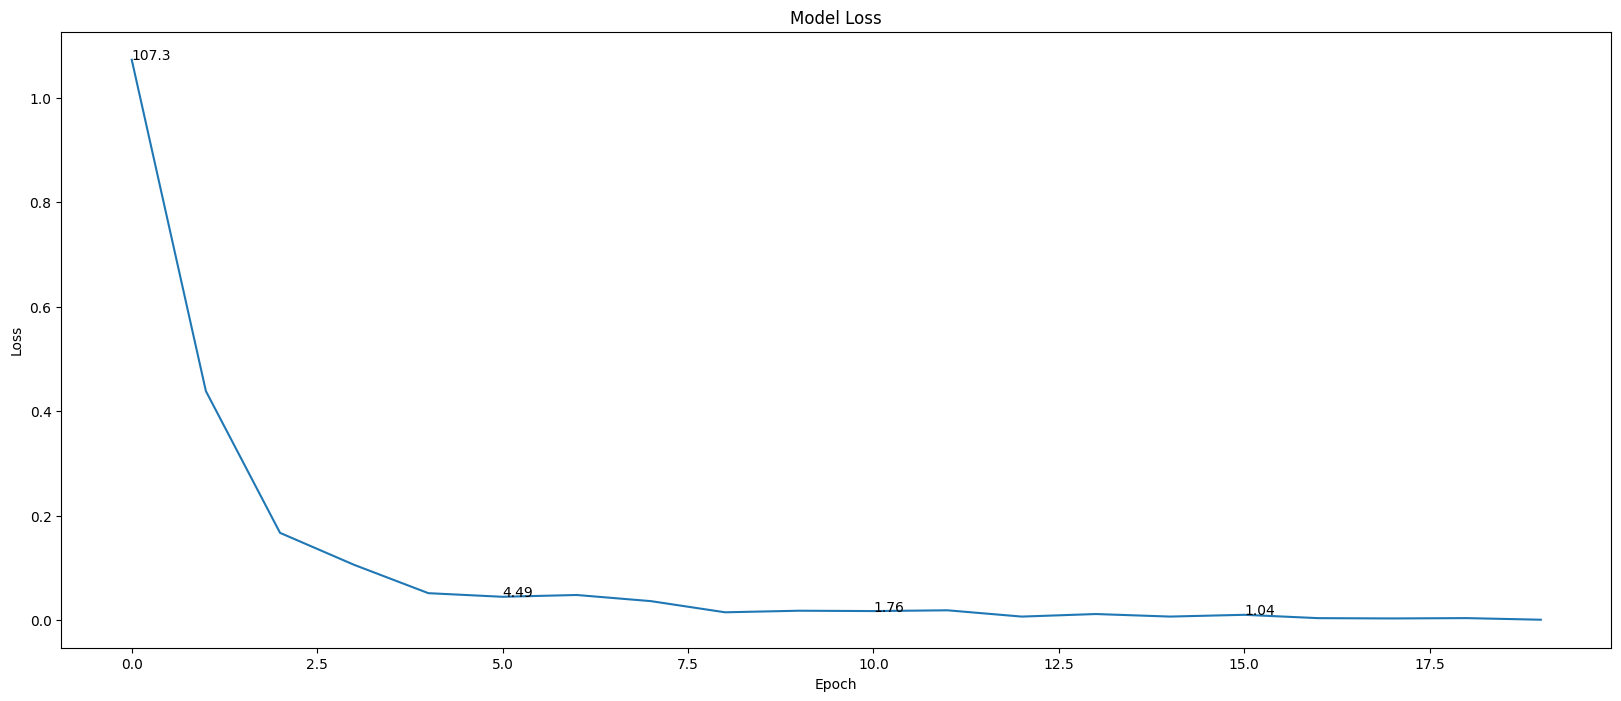

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()